# Proyecto de Regresión Logística (predecir el clic en un anuncio)

En este *notebook* usaremos la Regresión Logística para indicar si un usuario de Internet en particular hizo clic o no en un anuncio. Intentaremos crear un modelo que prediga si harán clic o no en un anuncio en función de las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* '`Daily Time Spent on Site`': tiempo del consumidor en el sitio en minutos.
* '`Age`': edad del cliente en años.
* '`Area Income`': promedio de renta del área geográfica del consumidor.
* '`Daily Internet Usage`': promedio en minutos al día del consumidor en Internet.
* '`Ad Topic Line`': titular del anuncio.
* '`City`': ciudad del consumidor.
* '`Male`': si el consumidor es hombre o mujer.
* '`Country`': país del consumidor.
* '`Timestamp`': hora en la que el consumidor hizo clic en el anuncio o cerró la ventana.
* '`Clicked on Ad`': 0 o 1 indican si el consumidor hizo clic en el anuncio.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

## Carga de datos

In [2]:
df=pd.read_csv('./data/advertising.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


El Timestamp viene en formato string (Object). Lo convertiremos en un bobjeto Temporal:

In [4]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


# 1. Análisis exploratorio de datos (*EDA*)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,2016-04-10 10:34:06.636000256,0.50000
min,32.600000,19.000000,13996.500000,104.780000,0.000000,2016-01-01 02:52:10,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,2016-02-18 02:55:42,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,2016-04-07 17:27:29.500000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,2016-05-31 03:18:14,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,2016-07-24 00:22:16,1.00000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,NaN,0.50025


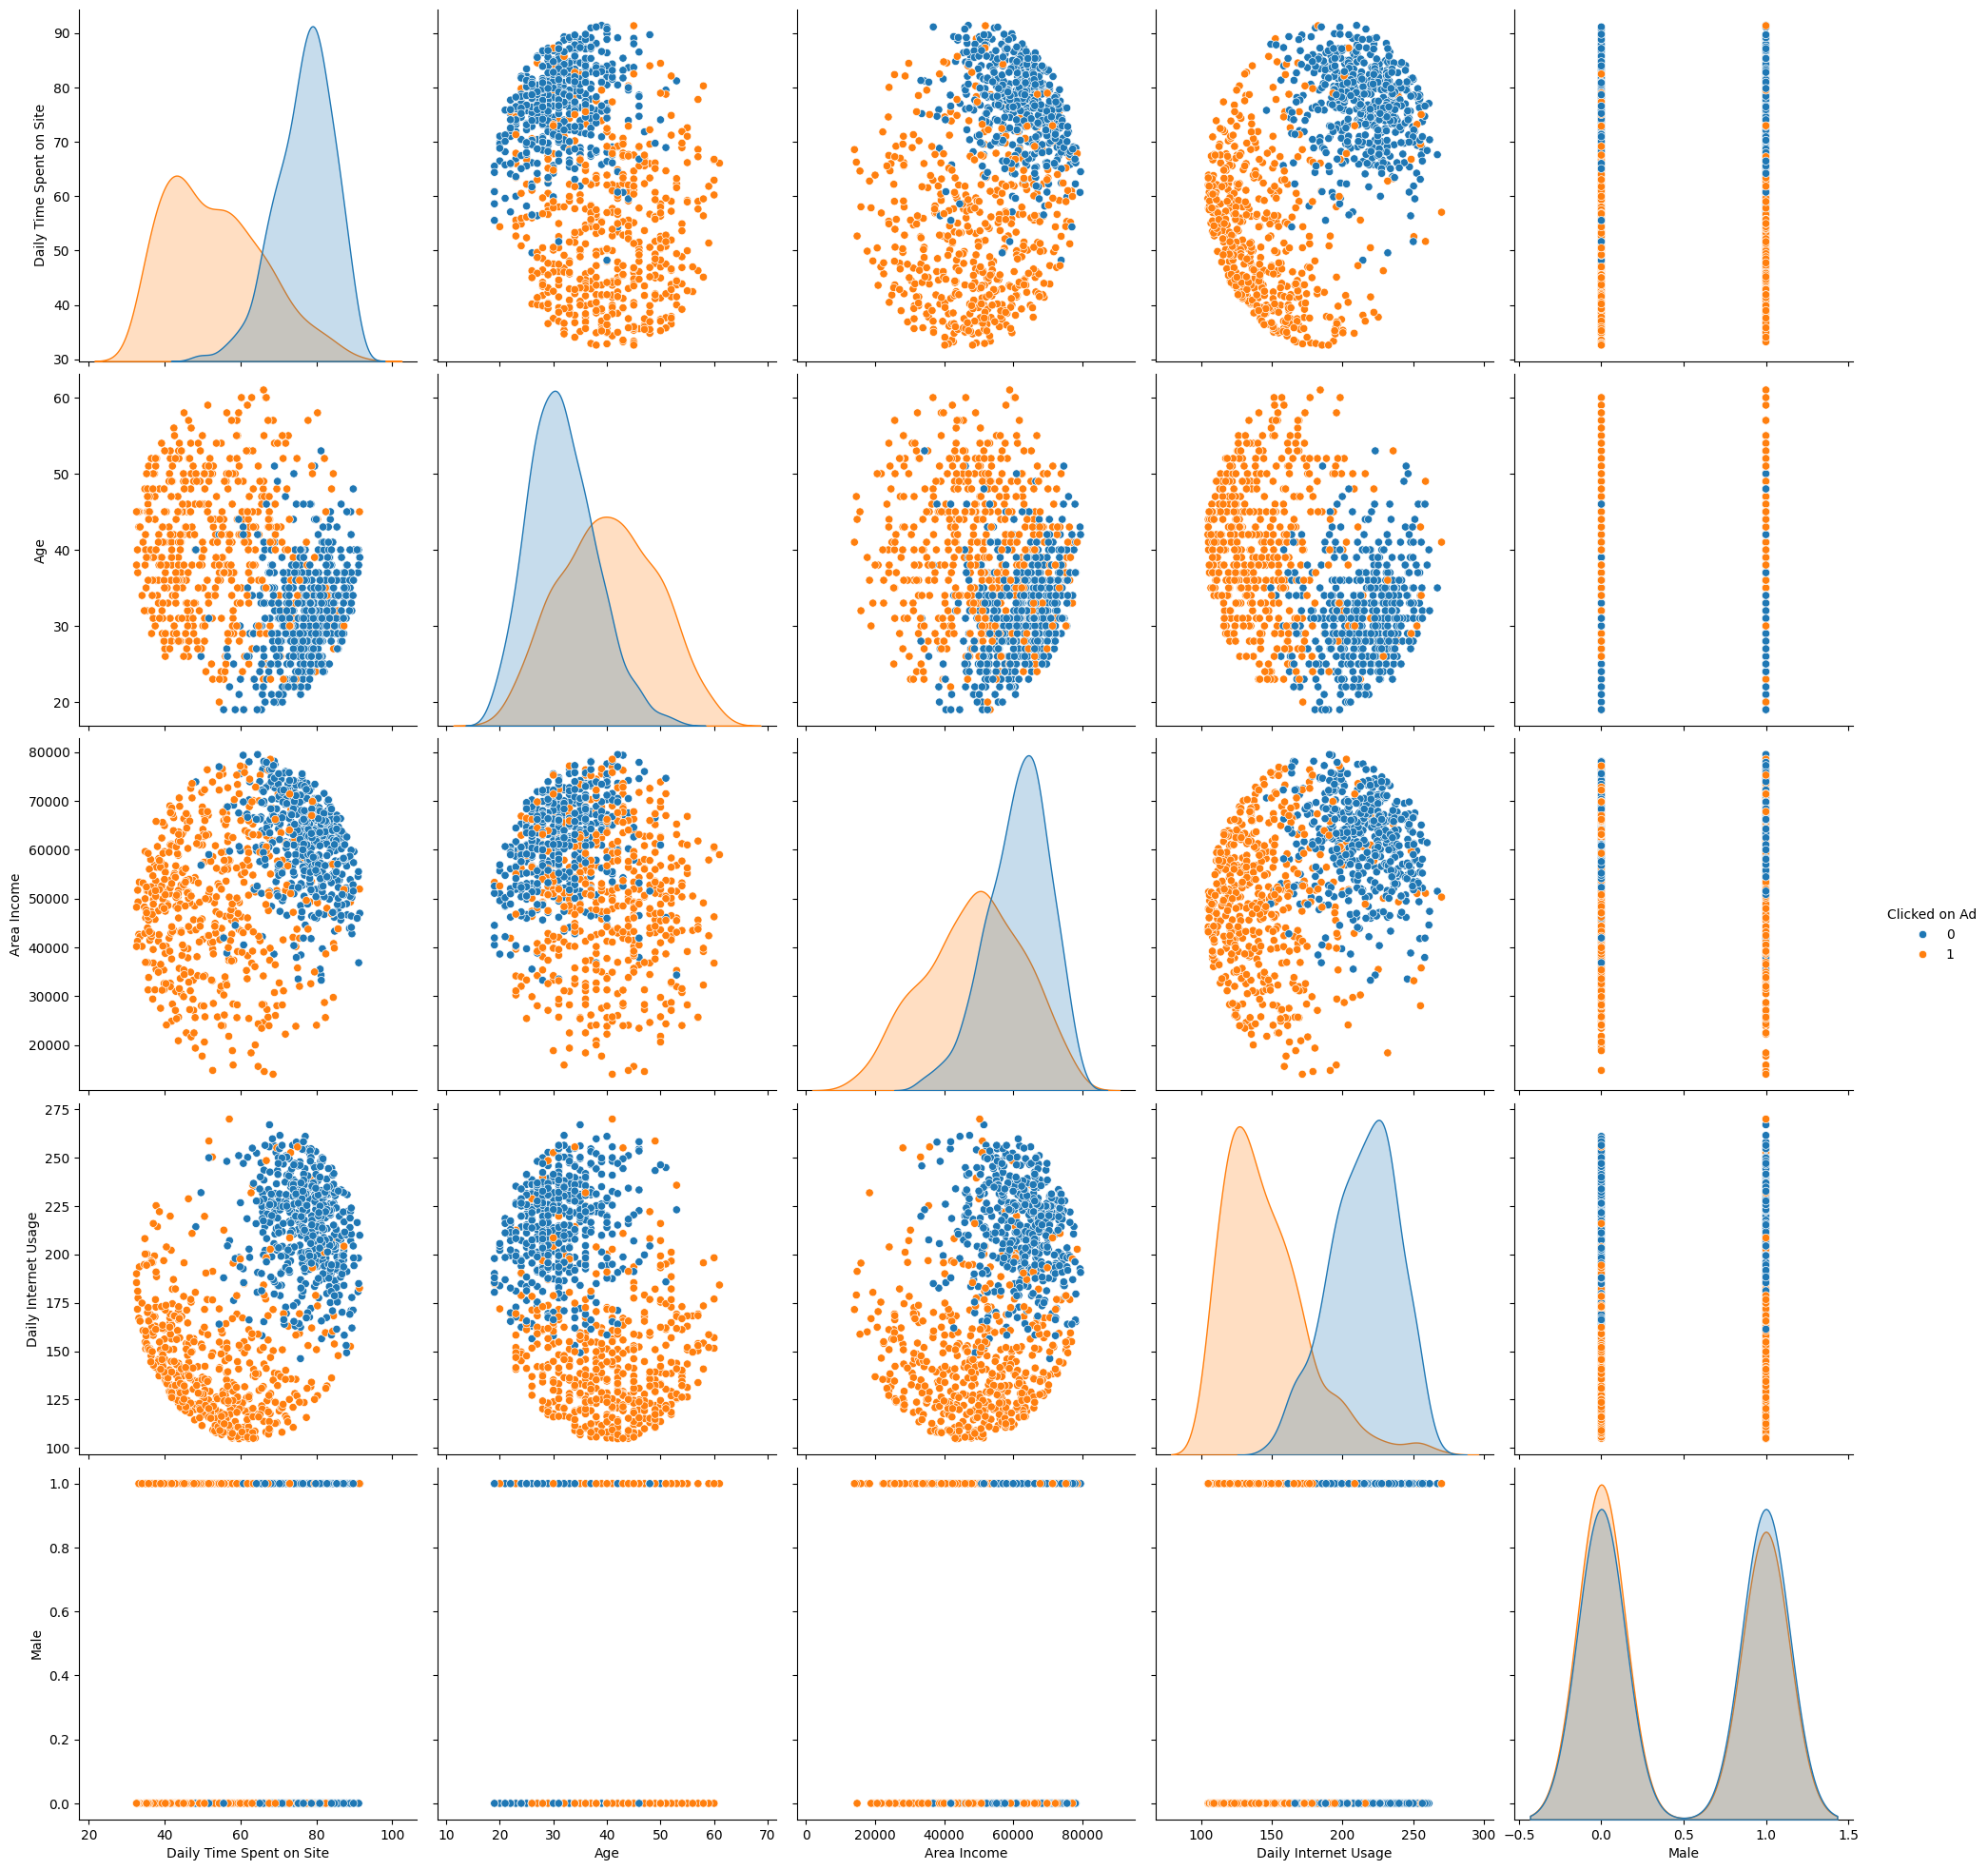

In [7]:
sns.pairplot(df,
            hue='Clicked on Ad',
            height=4)
            #vars=['Daily Time Spent on Site', 'Age','Daily Internet Usage', 'Area Income'])
            #kind='reg')

<Axes: >

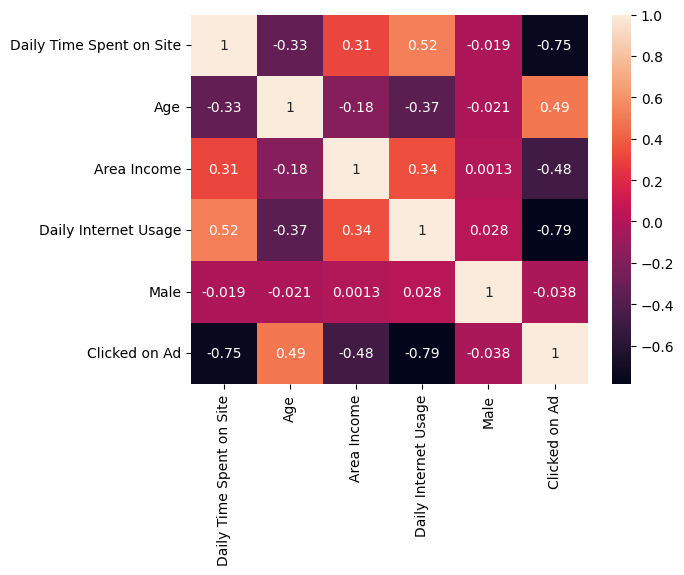

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Figure size 2000x1200 with 0 Axes>

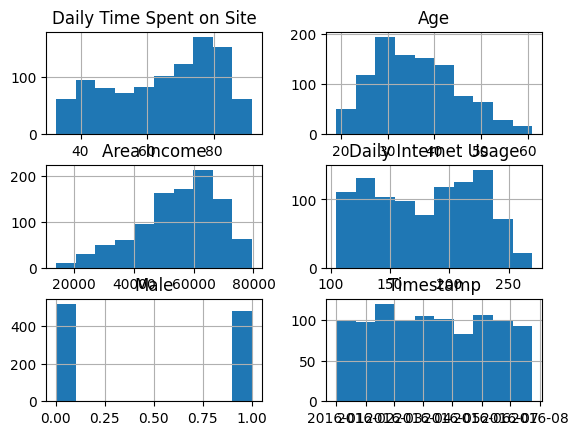

In [9]:
plt.figure(figsize=(20, 12))
df.drop(['Clicked on Ad'], axis=1).hist() 
plt.show()

In [10]:
df.keys()

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

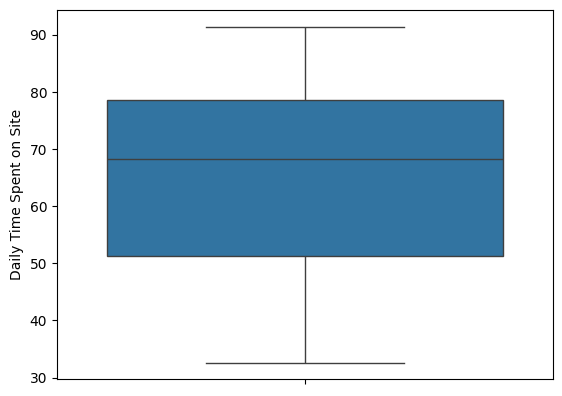

In [11]:
sns.boxplot(df['Daily Time Spent on Site']);

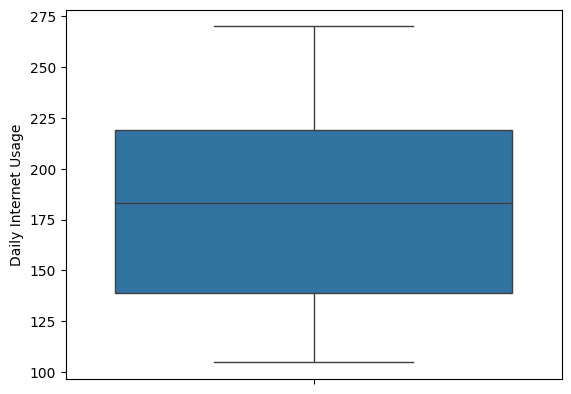

In [12]:
sns.boxplot(df['Daily Internet Usage']);

<Axes: ylabel='Age'>

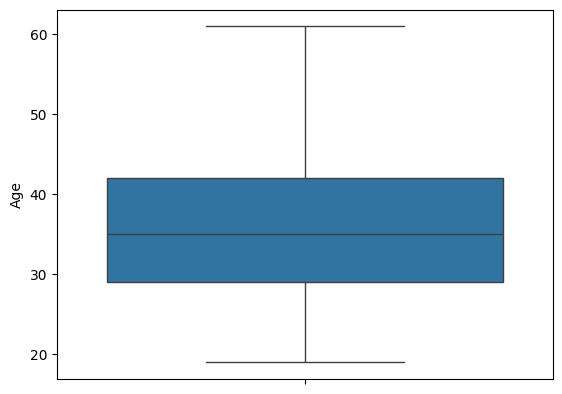

In [13]:
sns.boxplot(df['Age'])

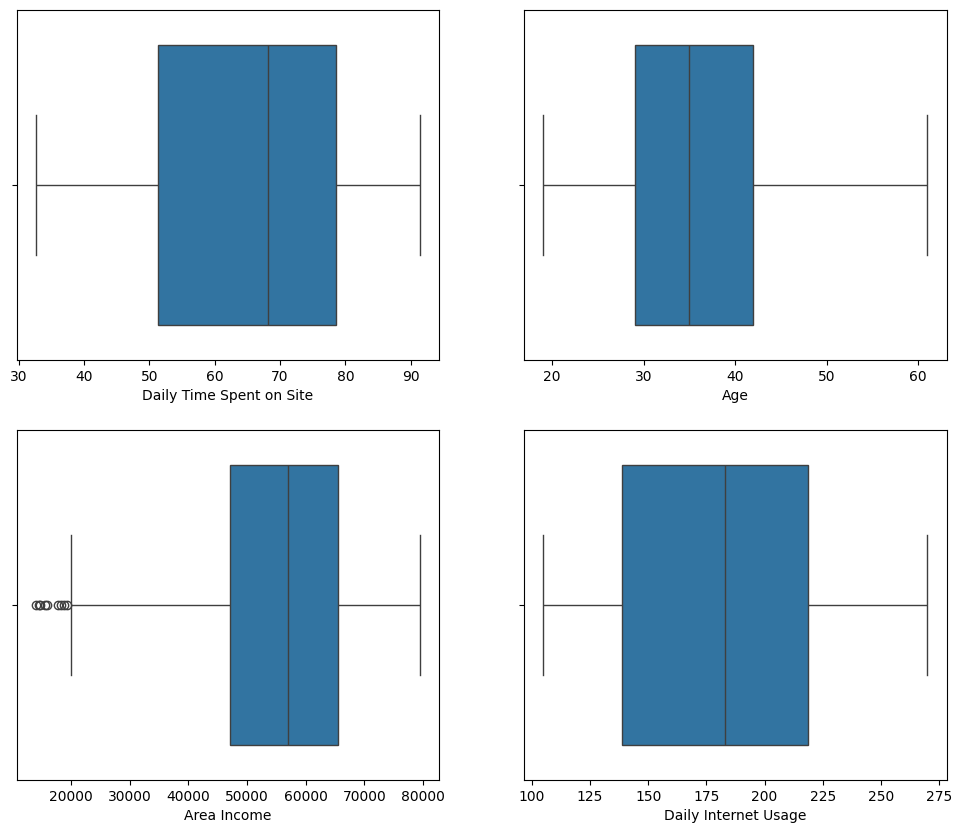

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
columnas = [['Daily Time Spent on Site', 'Age'],
            ['Area Income', 'Daily Internet Usage']]
for i in range(2):
    for j in range(2):
        sns.boxplot(x=columnas[i][j], data=df, ax=axes[i, j])
plt.show()

# 2. Preparación de datos para la Regresión Logística

#### 1. *Feature engineering*

In [15]:
df[df['Clicked on Ad']==1].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
10,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,0,Qatar,2016-03-16 20:19:01,1
12,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,1,Egypt,2016-06-03 01:14:41,1
14,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,0,Barbados,2016-03-24 09:31:49,1
15,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,1,Spain,2016-03-09 03:41:30,1


In [16]:
df['Age30']=np.where(df['Age']<30,1,0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age30
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0


<Axes: >

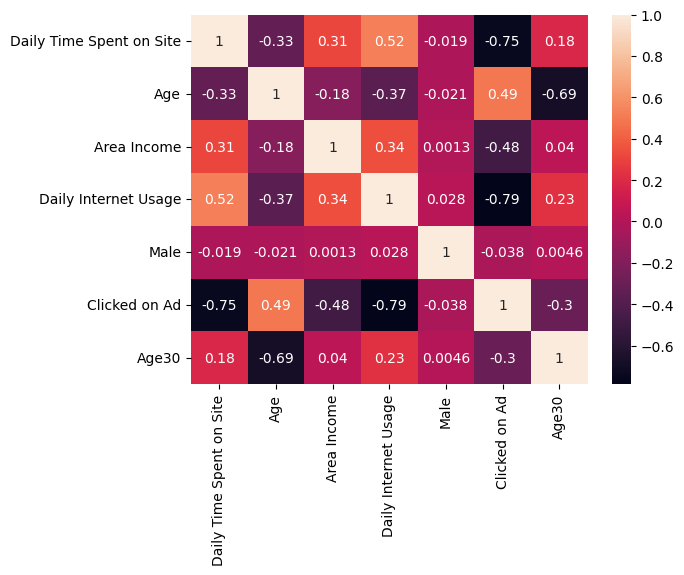

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [18]:
df['palabra_challenge']=np.where(df['Ad Topic Line'].str.contains('Face'),1,0) #Queremos ver por ejemplo los anucios que contienen la palabra challenge
df[df['palabra_challenge']==1]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age30,palabra_challenge
195,71.86,32,51633.34,116.53,Face-to-face even-keeled website,Kentmouth,0,Senegal,2016-05-17 06:14:20,1,0,1
207,84.08,30,62336.39,187.36,Face-to-face intermediate approach,Carterburgh,1,Fiji,2016-01-13 02:58:27,0,0,1
364,69.11,42,73608.99,231.48,Face-to-face mission-critical definition,Novaktown,1,Faroe Islands,2016-04-21 12:34:28,0,0,1
367,77.07,40,44559.43,261.02,Face-to-face analyzing encryption,Stephenborough,0,Afghanistan,2016-03-01 10:01:35,0,0,1
384,49.67,27,28019.09,153.69,Face-to-face reciprocal methodology,Port Brian,0,Zimbabwe,2016-05-09 08:44:55,1,1,1
414,86.63,39,63764.28,209.64,Face-to-face multimedia success,New Jessicaport,1,Costa Rica,2016-04-06 21:20:07,0,0,1
592,73.15,25,64631.22,211.12,Face-to-face executive encryption,Lake Patrick,1,Libyan Arab Jamahiriya,2016-01-29 07:14:04,0,1,1
689,77.50,28,60997.84,225.34,Face-to-face responsive alliance,Kennedyfurt,1,Antarctica (the territory South of 60 deg S),2016-07-13 14:05:22,0,1,1
701,69.77,54,57667.99,132.27,Face-to-face dedicated flexibility,Port Sherrystad,0,Malta,2016-06-01 03:17:50,1,0,1
833,45.99,33,51163.14,124.61,Face-to-face methodical intranet,South Mark,1,Afghanistan,2016-02-27 15:04:52,1,0,1


In [19]:
df['Ad Topic Line'].str.split(' ')

0         [Cloned, 5thgeneration, orchestration]
1         [Monitored, national, standardization]
2           [Organic, bottom-line, service-desk]
3      [Triple-buffered, reciprocal, time-frame]
4              [Robust, logistical, utilization]
                         ...                    
995            [Fundamental, modular, algorithm]
996          [Grass-roots, cohesive, monitoring]
997             [Expanded, intangible, solution]
998     [Proactive, bandwidth-monitored, policy]
999          [Virtual, 5thgeneration, emulation]
Name: Ad Topic Line, Length: 1000, dtype: object

In [20]:
df['palabra_challenge'].value_counts()

palabra_challenge
0    989
1     11
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df['City'])
df['City_encoded']=le.transform(df['City'])

df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age30,palabra_challenge,City_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1,0,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,0,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,0,805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,0,126
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,0,488
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0,0,798
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,1,0,935


In [22]:
pd.get_dummies(df['Country'])

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df['month']=df['Timestamp'].dt.month
df['hour']=df['Timestamp'].dt.hour
df['weekday']=df['Timestamp'].dt.weekday
df['day']=df['Timestamp'].dt.day
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Age30,palabra_challenge,City_encoded,month,hour,weekday,day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,961,3,0,6,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0,903,4,1,0,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,1,0,111,3,20,6,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,0,939,1,2,6,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,0,805,6,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,0,126,2,21,3,11
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,0,488,4,2,4,22
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0,0,798,2,17,0,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,1,0,935,3,2,3,24


<Axes: >

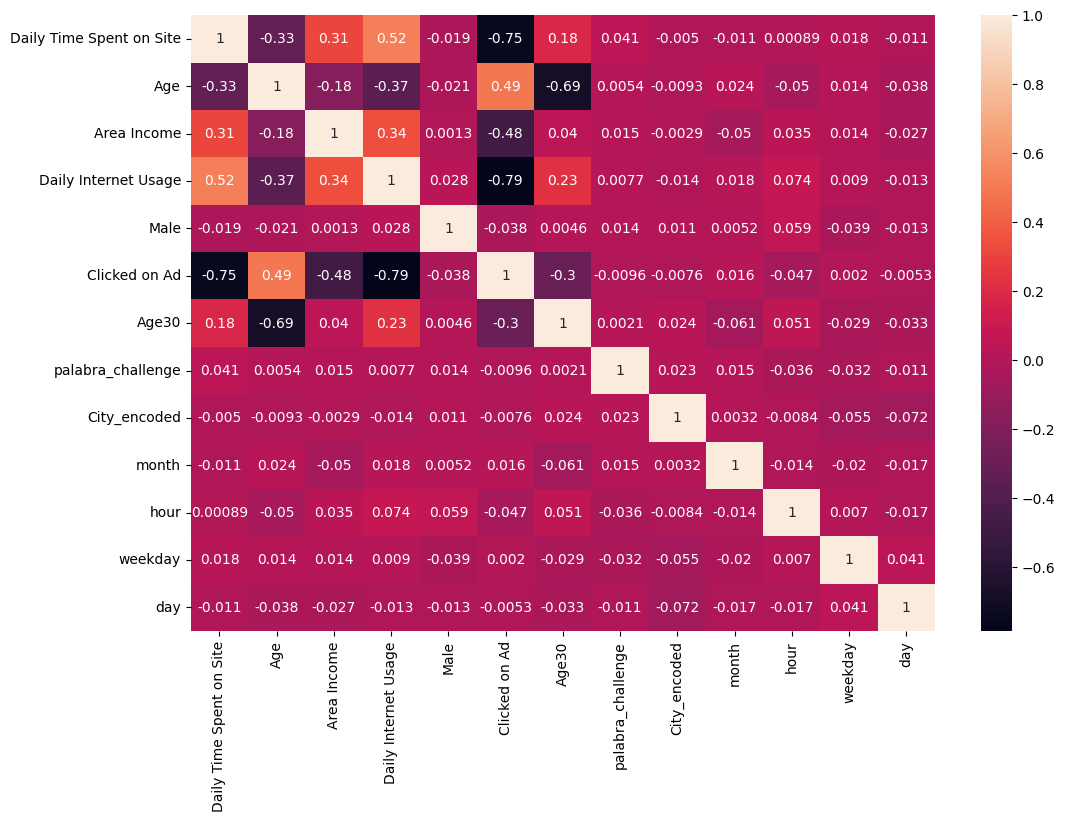

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

#### 2. *Train test split*

In [25]:
X=np.array(df[['Daily Time Spent on Site', 'Age','Area Income','Daily Internet Usage']])
y=np.array(df['Clicked on Ad'])

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.20,random_state=42)
print('Dimensión entrenamientp: ', x_train.shape)
print('Dimension test: ', x_test.shape)

Dimensión entrenamientp:  (800, 4)
Dimension test:  (200, 4)


#### 3. *StandardScaler()*

In [27]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Si queremos retroceder:

In [28]:
#scaler.inverse_transform(x_train)

# 3. Implementa un algoritmo de Regresión Logística en Scikit-Learn y ejecuta las predicciones. Use validación cruzada.

### Sin validacion cruzada.

In [35]:
#Entrenamiento
modelo=LogisticRegression(max_iter=1000)
modelo.fit(x_train,y_train)

#Test
predictions=modelo.predict(x_test)
print('Accuracy train: ', modelo.score(x_train, y_train))
print('Accuracy test: ', accuracy_score(y_test, predictions))

Accuracy train:  0.9725
Accuracy test:  0.95


Realmente el accuracy no es una medida 100x100 representativa de la validación de nuestro modelo. Debemos mirar otras mediciones.

In [30]:
c_matrix=confusion_matrix(y_test,predictions)
c_matrix

array([[ 87,   2],
       [  8, 103]], dtype=int64)

<Axes: >

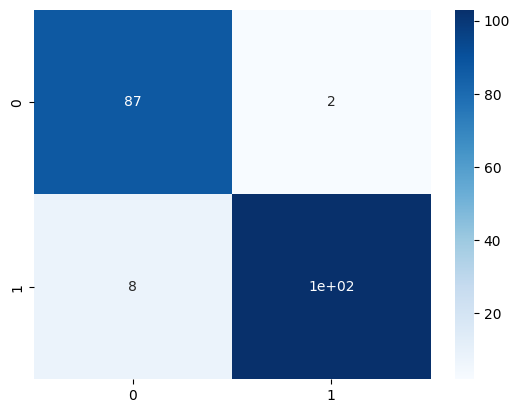

In [31]:
sns.heatmap(c_matrix,annot=True, cmap='Blues')

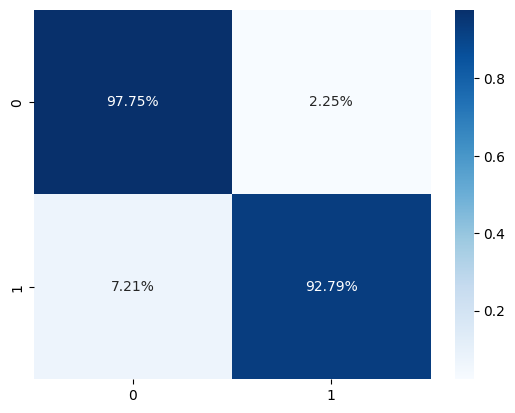

In [32]:
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

### Con validacion cruzada.

# AQUI TENGO ALGO MAL MIRAR

In [ ]:
#Entrenamiento
modelo=LogisticRegression(max_iter=1000)
modelo.fit(x_train,y_train)

#Test
predictions=modelo.predict(x_test)
print('Accuracy train: ', modelo.score(x_train, y_train))
print('Accuracy test: ', accuracy_score(y_test, predictions))

In [43]:
#Validación cruzada
modelo=LogisticRegression(max_iter=1000)
modelo.fit(x_train,y_train)
cruzada=cross_val_score(modelo,x_train,y_train,cv=5, scoring='accuracy') #cv: numero de divisiones para la validacion. Si no indicas scorring coje el que tiene el modelo por defecto

print("Accuracy en cada fold:", cruzada)
print("Accuracy promedio:", np.mean(cruzada))

Accuracy en cada fold: [0.98125 0.9875  0.9625  0.94375 0.98125]
Accuracy promedio: 0.9712500000000001


In [42]:
#Entrenamiento
predictions=modelo.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, predictions))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 4. Evaluación

In [40]:
c_matrix=confusion_matrix(y_test,predictions)
c_matrix

array([[ 87,   2],
       [  8, 103]], dtype=int64)

#### 1. Matriz de Confusión

In [ ]:
sns.heatmap(c_matrix,annot=True, cmap='Blues')

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

#### 2. Precisión

In [ ]:
c_matrix=confusion_matrix(y_test,predictions)
c_matrix

In [ ]:
true_negative=c_matrix[0][0]
false_positive=c_matrix[0][1]
true_positive=c_matrix[1][1]
false_negative=c_matrix[1][0]

La precisión nos dice cuantos aciertos ha tenido de los datos que ha predicho como True

TP/(TP+FP)

In [ ]:
precision=true_positive/(true_positive+false_positive)
precision

#### 3. Sensibilidad (*recall*)

La sensibilidad compara los positivos que ha calificado bien vs todos los positivos que habia

TP/(TP+FN)

In [ ]:
recall=true_positive/(true_positive+false_negative)
recall



#### 4. F1 Score


2 * precision * recall / (precision + recall)

In [ ]:
F1=2*precision*recall/(precision+recall)
F1

#### 5. Curva ROC

**OPCIÓN 1**

> sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
>
>RETURNS:
>
> - **fpr**: Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
> - **tpr**: Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
> - **Thersholds**: Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to np.inf.

In [ ]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test,predictions)

Otra medida utril es calcular la area debajo de la curva ROC (cuanto mas grande sea mejor)

In [ ]:
roc_auc_score(y_test,predictions)

**OPCIÓN 2**

#### 6. Curva P-R

Curva precision-recall.

In [ ]:
def plot_PR(y_test,predictions):
    precision,recall,thresholds=precision_recall_curve(y_test,predictions)
    plt.plot(precision,recall)
    plt.xlabel('Precision')
    plt.ylabel('Recall')

plot_PR(y_test,predictions)